#1. Graph Representation:
- NetworkX library import.
- To represent the stores and their relationships, make an empty graph G.
- specify the shop data in the shops list as dictionaries.
- Using G, add each store as a node to the graph.add_node().
- specify in the connections list the links between the stores and add them as edges using G.add_edges_from().
Display the graph's adjacency list, which includes information about the shops' neighbors.


In [19]:
import networkx as nx

# Create an empty graph
G = nx.Graph()

# Define your shop data
shops = [
    {"Shop Number": 1, "Shop Name": "ABC Electronics", "Category": "Electronics", "Location": "Floor 1, Aisle 3", "Rating": 4},
    {"Shop Number": 2, "Shop Name": "Fashion Paradise", "Category": "Clothing", "Location": "Floor 2, Aisle 1", "Rating": 5},
    {"Shop Number": 3, "Shop Name": "XYZGadgets", "Category": "Electronics", "Location": "Floor 2, Aisle 3", "Rating": 5},
]

# Add shops as nodes to the graph
for shop in shops:
    G.add_node(shop["Shop Number"], shop_data=shop)

# Define connections between shops (for example, connecting all shops)
connections = [
    (1, 2),
    (1, 3),
    (2, 3),
]

# Add edges to represent connections between shops
G.add_edges_from(connections)

# Display the adjacency list of the graph
for node, neighbors in G.adjacency():
    shop_data = G.nodes[node]["shop_data"]
    neighbor_shop_names = [G.nodes[neighbor]["shop_data"]["Shop Name"] for neighbor in neighbors]
    print(f"Shop {node}: {shop_data['Shop Name']}, Neighbors: {', '.join(neighbor_shop_names)}")


Shop 1: ABC Electronics, Neighbors: Fashion Paradise, XYZGadgets
Shop 2: Fashion Paradise, Neighbors: ABC Electronics, XYZGadgets
Shop 3: XYZGadgets, Neighbors: ABC Electronics, Fashion Paradise


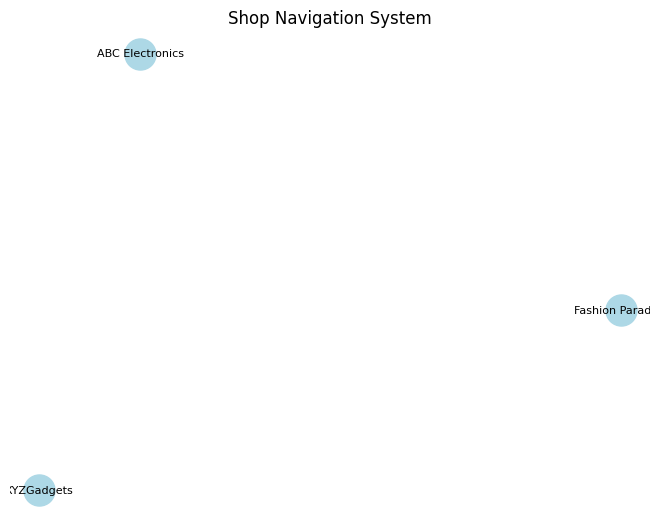

In [25]:
import matplotlib.pyplot as plt
# Example usage:
if __name__ == "__main__":
    shop_system = ShopNavigationSystem()

    # Add sample shops
    sample_shops = [
        {"Shop Number": 1, "Shop Name": "ABC Electronics", "Category": "Electronics", "Location": "Floor 1, Aisle 3", "Rating": 4},
        {"Shop Number": 2, "Shop Name": "Fashion Paradise", "Category": "Clothing", "Location": "Floor 2, Aisle 1", "Rating": 5},
        {"Shop Number": 3, "Shop Name": "XYZGadgets", "Category": "Electronics", "Location": "Floor 2, Aisle 3", "Rating": 5},
    ]

    for shop_data in sample_shops:
        shop_system.add_shop_node(shop_data)

    # Display the graph
    shop_system.display_graph()


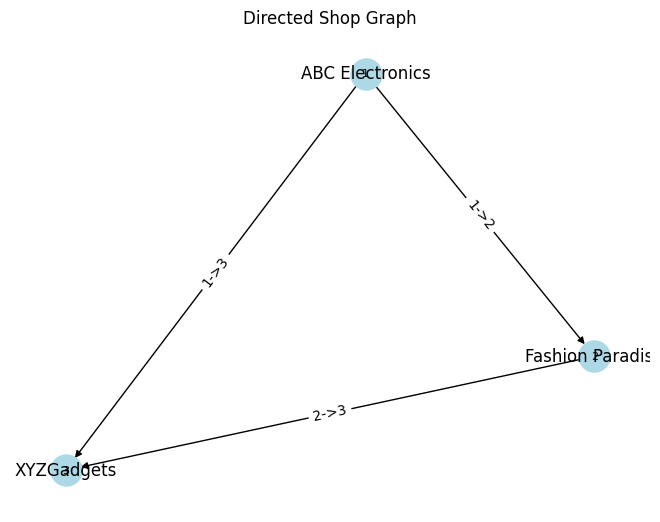

In [89]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a directed graph
G = nx.DiGraph()

# Define your shop data
shops = [
    {"Shop Number": 1, "Shop Name": "ABC Electronics", "Category": "Electronics", "Location": "Floor 1, Aisle 3", "Rating": 4},
    {"Shop Number": 2, "Shop Name": "Fashion Paradise", "Category": "Clothing", "Location": "Floor 2, Aisle 1", "Rating": 5},
    {"Shop Number": 3, "Shop Name": "XYZGadgets", "Category": "Electronics", "Location": "Floor 2, Aisle 3", "Rating": 5},
]

# Add shops as nodes to the directed graph
for shop in shops:
    G.add_node(shop["Shop Number"], shop_data=shop)

# Define directed edges to represent connections between shops
connections = [
    (1, 2),  # Shop 1 to Shop 2
    (1, 3),  # Shop 1 to Shop 3
    (2, 3),  # Shop 2 to Shop 3
]

# Add directed edges to the graph
G.add_edges_from(connections)

# Create a layout for the graph
layout = nx.spring_layout(G, seed=42)

# Draw the graph with labels and edge labels
node_labels = {node: G.nodes[node]["shop_data"]["Shop Name"] for node in G.nodes()}
edge_labels = {(source, target): f"{source}->{target}" for source, target in G.edges()}

nx.draw(G, pos=layout, with_labels=True, node_size=500, node_color='lightblue', font_size=8)
nx.draw_networkx_labels(G, pos=layout, labels=node_labels)
nx.draw_networkx_edge_labels(G, pos=layout, edge_labels=edge_labels)

# Show the graph
plt.title("Directed Shop Graph")
plt.show()


#2. Node Operations

##Adding a Shop Node and Check Errors and Exceptions

Adjacency List (Before Adding a New Shop):
Shop 1: ABC Electronics, Neighbors: 
Shop 2: Fashion Paradise, Neighbors: 
Shop 3: XYZGadgets, Neighbors: 

Graph with All Shops:


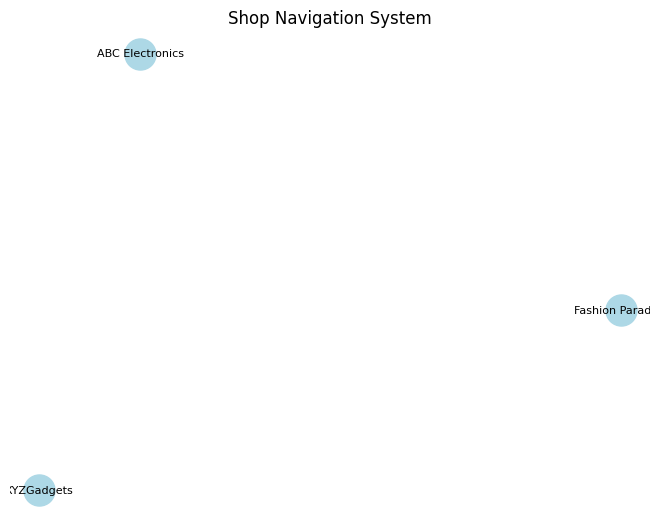


Adjacency List (After Adding a New Shop):
Shop 1: ABC Electronics, Neighbors: 
Shop 2: Fashion Paradise, Neighbors: 
Shop 3: XYZGadgets, Neighbors: 
Shop 4: New Shop, Neighbors: 

Graph with All Shops (After Adding a New Shop):


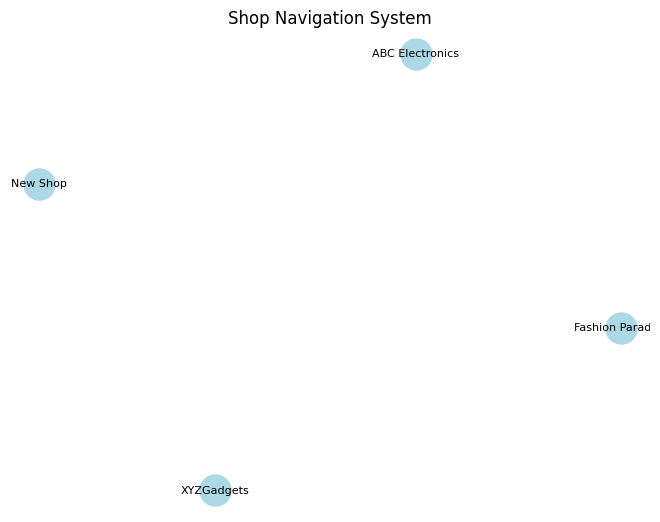

In [30]:
import networkx as nx
import matplotlib.pyplot as plt

class ShopNavigationSystem:
    def __init__(self):
        # Create an empty graph
        self.G = nx.Graph()

    def add_shop_node(self, shop_data):
        """
        Add a new shop node to the graph.
        Args:
            shop_data (dict): Dictionary containing shop information.
        """
        shop_number = shop_data["Shop Number"]

        # Check if the shop already exists in the graph
        if self.G.has_node(shop_number):
            raise ValueError(f"Shop {shop_number} already exists in the system.")

        # Add the shop as a node with its data
        self.G.add_node(shop_number, shop_data=shop_data)

    def display_adjacency_list(self):
        """
        Display the adjacency list of the graph.
        """
        for node, neighbors in self.G.adjacency():
            shop_data = self.G.nodes[node]["shop_data"]
            neighbor_shop_names = [self.G.nodes[neighbor]["shop_data"]["Shop Name"] for neighbor in neighbors]
            print(f"Shop {node}: {shop_data['Shop Name']}, Neighbors: {', '.join(neighbor_shop_names)}")

    def display_graph(self):
        """
        Display the graph with vertices and edges using matplotlib.
        """
        pos = nx.spring_layout(self.G, seed=42)  # Layout for positioning nodes
        shop_labels = {node: self.G.nodes[node]["shop_data"]["Shop Name"] for node in self.G.nodes()}

        nx.draw(self.G, pos, labels=shop_labels, with_labels=True, node_size=500, node_color='lightblue', font_size=8)
        plt.title("Shop Navigation System")
        plt.show()

# Example usage:
if __name__ == "__main__":
    shop_system = ShopNavigationSystem()

    # Add sample shops
    sample_shops = [
        {"Shop Number": 1, "Shop Name": "ABC Electronics", "Category": "Electronics", "Location": "Floor 1, Aisle 3", "Rating": 4},
        {"Shop Number": 2, "Shop Name": "Fashion Paradise", "Category": "Clothing", "Location": "Floor 2, Aisle 1", "Rating": 5},
        {"Shop Number": 3, "Shop Name": "XYZGadgets", "Category": "Electronics", "Location": "Floor 2, Aisle 3", "Rating": 5},
    ]

    for shop_data in sample_shops:
        shop_system.add_shop_node(shop_data)

    # Display adjacency list before adding a new shop
    print("Adjacency List (Before Adding a New Shop):")
    shop_system.display_adjacency_list()

    # Display the graph with all shops
    print("\nGraph with All Shops:")
    shop_system.display_graph()

    # Add a new shop
    new_shop_data = {
        "Shop Number": 4,
        "Shop Name": "New Shop",
        "Category": "Miscellaneous",
        "Location": "Floor 3, Aisle 2",
        "Rating": 3
    }
    shop_system.add_shop_node(new_shop_data)

    # Display adjacency list after adding a new shop
    print("\nAdjacency List (After Adding a New Shop):")
    shop_system.display_adjacency_list()

    # Display the updated graph with all shops
    print("\nGraph with All Shops (After Adding a New Shop):")
    shop_system.display_graph()


##Deleting a Shop Node and Check Errors and Exceptions

Adjacency List (Before Deleting a Shop):
Shop 1: ABC Electronics
Shop 2: Fashion Paradise
Shop 3: XYZGadgets
Shop 4: New Shop

Graph with All Shops:


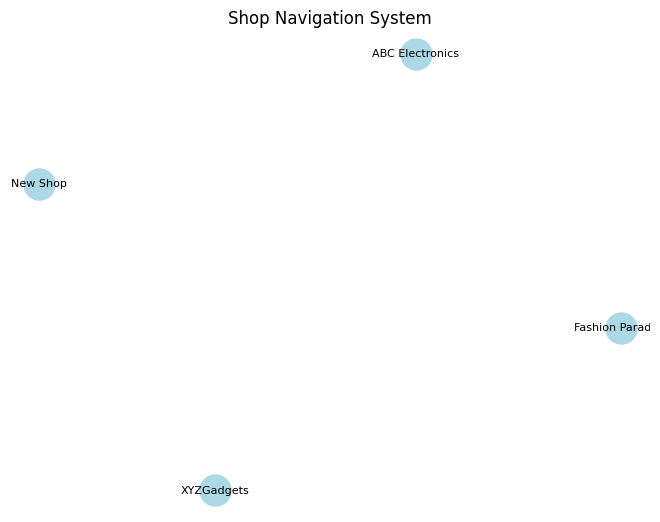

Shop 5 does not exist in the system.

Adjacency List (After Attempting to Delete a Shop That Does Not Exist):
Shop 1: ABC Electronics
Shop 2: Fashion Paradise
Shop 3: XYZGadgets
Shop 4: New Shop

Graph after Deleting Shop Number 4:


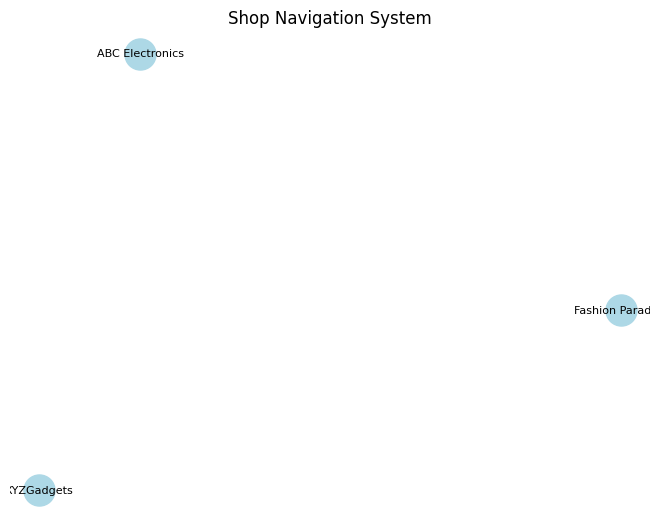

In [43]:
import networkx as nx
import matplotlib.pyplot as plt

class ShopNavigationSystem:
    def __init__(self):
        # Create an empty graph
        self.G = nx.Graph()

    def add_shop_node(self, shop_data):
        """
        Add a new shop node to the graph.
        Args:
            shop_data (dict): Dictionary containing shop information.
        """
        shop_number = shop_data["Shop Number"]

        # Check if the shop already exists in the graph
        if self.G.has_node(shop_number):
            raise ValueError(f"Shop {shop_number} already exists in the system.")

        # Add the shop as a node with its data
        self.G.add_node(shop_number, shop_data=shop_data)

    def delete_shop_node(self, shop_number):
        """
        Delete a shop node from the graph.
        Args:
            shop_number (int): The unique identifier of the shop to delete.
        """
        # Check if the shop exists in the graph
        if not self.G.has_node(shop_number):
            raise ValueError(f"Shop {shop_number} does not exist in the system.")

        # Remove the shop node from the graph
        self.G.remove_node(shop_number)

    def display_adjacency_list(self):
        """
        Display the adjacency list of the graph.
        """
        for node, neighbors in self.G.adjacency():
            shop_data = self.G.nodes[node]["shop_data"]
            neighbor_shop_names = [self.G.nodes[neighbor]["shop_data"]["Shop Name"] for neighbor in neighbors]
            neighbors_str = ", Neighbors: " + ", ".join(neighbor_shop_names) if neighbor_shop_names else ""
            print(f"Shop {node}: {shop_data['Shop Name']}{neighbors_str}")

    def display_graph(self):
        """
        Display the graph with vertices and edges using matplotlib.
        """
        pos = nx.spring_layout(self.G, seed=42)  # Layout for positioning nodes
        shop_labels = {node: self.G.nodes[node]["shop_data"]["Shop Name"] for node in self.G.nodes()}

        nx.draw(self.G, pos, labels=shop_labels, with_labels=True, node_size=500, node_color='lightblue', font_size=8)
        plt.title("Shop Navigation System")
        plt.show()

# Example usage:
if __name__ == "__main__":
    shop_system = ShopNavigationSystem()

    # Add sample shops
    sample_shops = [
        {"Shop Number": 1, "Shop Name": "ABC Electronics", "Category": "Electronics", "Location": "Floor 1, Aisle 3", "Rating": 4},
        {"Shop Number": 2, "Shop Name": "Fashion Paradise", "Category": "Clothing", "Location": "Floor 2, Aisle 1", "Rating": 5},
        {"Shop Number": 3, "Shop Name": "XYZGadgets", "Category": "Electronics", "Location": "Floor 2, Aisle 3", "Rating": 5},
        {"Shop Number": 4, "Shop Name": "New Shop", "Category": "Miscellaneous", "Location": "Floor 3, Aisle 2","Rating": 3},
    ]

    for shop_data in sample_shops:
        shop_system.add_shop_node(shop_data)

    # Display adjacency list before deleting a shop
    print("Adjacency List (Before Deleting a Shop):")
    shop_system.display_adjacency_list()

    # Display the graph with all shops
    print("\nGraph with All Shops:")
    shop_system.display_graph()

    # Try to delete a shop that does not exist
    try:
        shop_system.delete_shop_node(5)  # Attempting to delete Shop Number 5
    except ValueError as e:
        print(e)

    # Display adjacency list after attempting to delete a shop that does not exist
    print("\nAdjacency List (After Attempting to Delete a Shop That Does Not Exist):")
    shop_system.display_adjacency_list()

    # Delete Shop Number 4
    shop_system.delete_shop_node(4)

    # Display the graph after deleting Shop Number 4
    print("\nGraph after Deleting Shop Number 4:")
    shop_system.display_graph()


##Updating Shop Information and Check Errors and Exceptions

Adjacency List (Before Updating Shop Information):
Shop 1: ABC Electronics
Shop 2: Fashion Paradise
Shop 3: XYZGadgets

Adjacency List (After Updating Shop Information):
Shop 1: New Name
Shop 2: Fashion Paradise
Shop 3: XYZGadgets

Graph with All Shops (After Updating Shop Information):


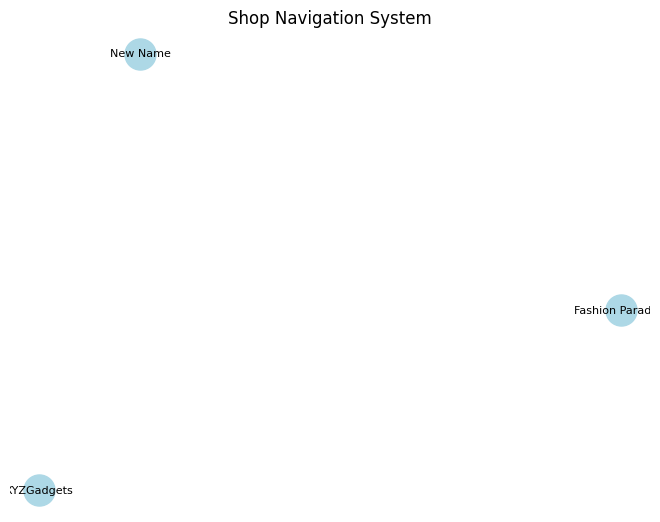

In [46]:
import networkx as nx
import matplotlib.pyplot as plt

class ShopNavigationSystem:
    def __init__(self):
        # Create an empty graph
        self.G = nx.Graph()

    def add_shop_node(self, shop_data):
        """
        Add a new shop node to the graph.
        Args:
            shop_data (dict): Dictionary containing shop information.
        """
        shop_number = shop_data["Shop Number"]

        # Check if the shop already exists in the graph
        if self.G.has_node(shop_number):
            raise ValueError(f"Shop {shop_number} already exists in the system.")

        # Add the shop as a node with its data
        self.G.add_node(shop_number, shop_data=shop_data)

    def update_shop_information(self, shop_number, updated_data):
        """
        Update the information associated with a shop node.
        Args:
            shop_number (int): The unique identifier of the shop to update.
            updated_data (dict): Dictionary containing updated shop information.
        """
        # Check if the shop exists in the graph
        if not self.G.has_node(shop_number):
            raise ValueError(f"Shop {shop_number} does not exist in the system.")

        # Update the shop's data with the provided updated_data
        self.G.nodes[shop_number]["shop_data"].update(updated_data)

    def delete_shop_node(self, shop_number):
        """
        Delete a shop node from the graph.
        Args:
            shop_number (int): The unique identifier of the shop to delete.
        """
        # Check if the shop exists in the graph
        if not self.G.has_node(shop_number):
            raise ValueError(f"Shop {shop_number} does not exist in the system.")

        # Remove the shop node from the graph
        self.G.remove_node(shop_number)

    def display_adjacency_list(self):
        """
        Display the adjacency list of the graph.
        """
        for node, neighbors in self.G.adjacency():
            shop_data = self.G.nodes[node]["shop_data"]
            neighbor_shop_names = [self.G.nodes[neighbor]["shop_data"]["Shop Name"] for neighbor in neighbors]
            neighbors_str = ", Neighbors: " + ", ".join(neighbor_shop_names) if neighbor_shop_names else ""
            print(f"Shop {node}: {shop_data['Shop Name']}{neighbors_str}")

    def display_graph(self):
        """
        Display the graph with vertices and edges using matplotlib.
        """
        pos = nx.spring_layout(self.G, seed=42)  # Layout for positioning nodes
        shop_labels = {node: self.G.nodes[node]["shop_data"]["Shop Name"] for node in self.G.nodes()}

        nx.draw(self.G, pos, labels=shop_labels, with_labels=True, node_size=500, node_color='lightblue', font_size=8)
        plt.title("Shop Navigation System")
        plt.show()

# Example usage:
if __name__ == "__main__":
    shop_system = ShopNavigationSystem()

    # Add sample shops
    sample_shops = [
        {"Shop Number": 1, "Shop Name": "ABC Electronics", "Category": "Electronics", "Location": "Floor 1, Aisle 3", "Rating": 4},
        {"Shop Number": 2, "Shop Name": "Fashion Paradise", "Category": "Clothing", "Location": "Floor 2, Aisle 1", "Rating": 5},
        {"Shop Number": 3, "Shop Name": "XYZGadgets", "Category": "Electronics", "Location": "Floor 2, Aisle 3", "Rating": 5},
    ]

    for shop_data in sample_shops:
        shop_system.add_shop_node(shop_data)

    # Display adjacency list before updating shop information
    print("Adjacency List (Before Updating Shop Information):")
    shop_system.display_adjacency_list()

    # Update the information for Shop Number 1
    updated_shop_data = {
        "Shop Name": "New Name",
        "Category": "New Category",
        "Location": "New Location",
        "Rating": 2
    }
    shop_system.update_shop_information(1, updated_shop_data)

    # Display adjacency list after updating shop information
    print("\nAdjacency List (After Updating Shop Information):")
    shop_system.display_adjacency_list()

    # Display the updated graph with all shops
    print("\nGraph with All Shops (After Updating Shop Information):")
    shop_system.display_graph()


#3. Edge Operations

##Add Edges

Graph with All Shops (Before Adding an Edge):


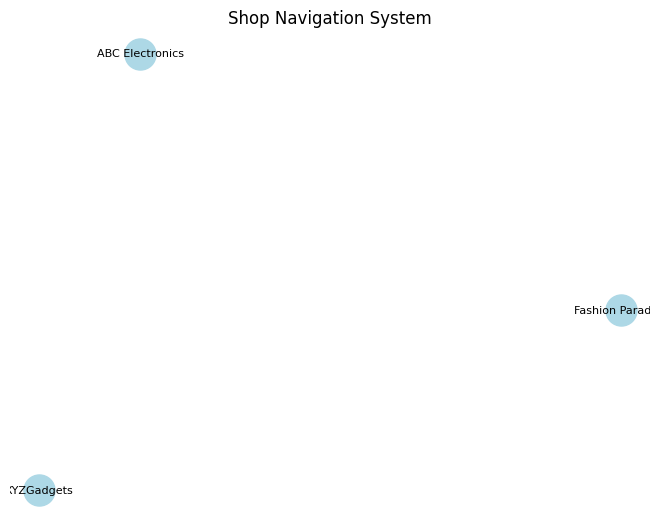


Graph with All Shops (After Adding an Edge):


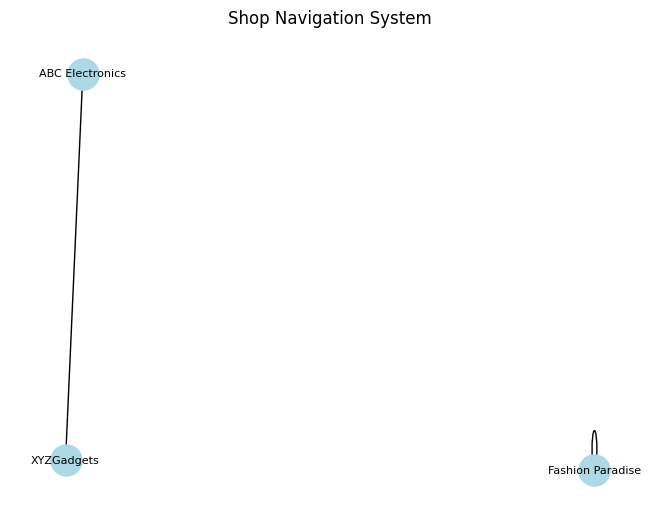

In [60]:
import networkx as nx
import matplotlib.pyplot as plt

class ShopNavigationSystem:
    def __init__(self):
        # Create an empty graph
        self.G = nx.Graph()

    def add_shop_node(self, shop_data):
        """
        Add a new shop node to the graph.
        Args:
            shop_data (dict): Dictionary containing shop information.
        """
        shop_number = shop_data["Shop Number"]

        # Check if the shop already exists in the graph
        if self.G.has_node(shop_number):
            raise ValueError(f"Shop {shop_number} already exists in the system.")

        # Add the shop as a node with its data
        self.G.add_node(shop_number, shop_data=shop_data)

    def update_shop_information(self, shop_number, updated_data):
        """
        Update the information associated with a shop node.
        Args:
            shop_number (int): The unique identifier of the shop to update.
            updated_data (dict): Dictionary containing updated shop information.
        """
        # Check if the shop exists in the graph
        if not self.G.has_node(shop_number):
            raise ValueError(f"Shop {shop_number} does not exist in the system.")

        # Update the shop's data with the provided updated_data
        self.G.nodes[shop_number]["shop_data"].update(updated_data)

    def delete_shop_node(self, shop_number):
        """
        Delete a shop node from the graph.
        Args:
            shop_number (int): The unique identifier of the shop to delete.
        """
        # Check if the shop exists in the graph
        if not self.G.has_node(shop_number):
            raise ValueError(f"Shop {shop_number} does not exist in the system.")

        # Remove the shop node from the graph
        self.G.remove_node(shop_number)

    def add_edge(self, shop_number_1, shop_number_2):
        """
        Add an edge to represent a connection between two shops.
        Args:
            shop_number_1 (int): The unique identifier of the first shop.
            shop_number_2 (int): The unique identifier of the second shop.
        """
        # Check if both shops exist in the graph
        if not self.G.has_node(shop_number_1) or not self.G.has_node(shop_number_2):
            raise ValueError("Both shops must exist in the system to add an edge.")

        # Add an edge between the two shops
        self.G.add_edge(shop_number_1, shop_number_2)

    def delete_edge(self, shop_number_1, shop_number_2):
        """
        Delete an edge representing a connection between two shops.
        Args:
            shop_number_1 (int): The unique identifier of the first shop.
            shop_number_2 (int): The unique identifier of the second shop.
        """
        # Check if both shops exist in the graph
        if not self.G.has_node(shop_number_1) or not self.G.has_node(shop_number_2):
            raise ValueError("Both shops must exist in the system to delete an edge.")

        # Check if an edge exists between the two shops
        if not self.G.has_edge(shop_number_1, shop_number_2):
            raise ValueError("No edge exists between the two shops.")

    def display_adjacency_list(self):
        """
        Display the adjacency list of the graph.
        """
        for node, neighbors in self.G.adjacency():
            shop_data = self.G.nodes[node]["shop_data"]
            neighbor_shop_names = [self.G.nodes[neighbor]["shop_data"]["Shop Name"] for neighbor in neighbors]
            neighbors_str = ", Neighbors: " + ", ".join(neighbor_shop_names) if neighbor_shop_names else ""
            print(f"Shop {node}: {shop_data['Shop Name']}{neighbors_str}")

    def display_graph(self):
        """
        Display the graph with vertices and edges using matplotlib.
        """
        pos = nx.spring_layout(self.G, seed=42)  # Layout for positioning nodes
        shop_labels = {node: self.G.nodes[node]["shop_data"]["Shop Name"] for node in self.G.nodes()}

        nx.draw(self.G, pos, labels=shop_labels, with_labels=True, node_size=500, node_color='lightblue', font_size=8)
        plt.title("Shop Navigation System")
        plt.show()

# Example usage:
if __name__ == "__main__":
    shop_system = ShopNavigationSystem()

    # Add sample shops
    sample_shops = [
        {"Shop Number": 1, "Shop Name": "ABC Electronics", "Category": "Electronics", "Location": "Floor 1, Aisle 3", "Rating": 4},
        {"Shop Number": 2, "Shop Name": "Fashion Paradise", "Category": "Clothing", "Location": "Floor 2, Aisle 1", "Rating": 5},
        {"Shop Number": 3, "Shop Name": "XYZGadgets", "Category": "Electronics", "Location": "Floor 2, Aisle 3", "Rating": 5},
    ]

    for shop_data in sample_shops:
        shop_system.add_shop_node(shop_data)

    # Display the graph before adding a new edge
    print("Graph with All Shops (Before Adding an Edge):")
    shop_system.display_graph()

    # Add an edge to create a new path/connection between Shop 1 and Shop 3
    shop_system.add_edge(1, 3)
    shop_system.add_edge(2, 2)

    # Display the updated graph with the new edge
    print("\nGraph with All Shops (After Adding an Edge):")
    shop_system.display_graph()


##Delete Edges

Adjacency List (Before Deleting an Edge):
Shop 1: ABC Electronics, Neighbors: Fashion Paradise
Shop 2: Fashion Paradise, Neighbors: ABC Electronics, XYZGadgets
Shop 3: XYZGadgets, Neighbors: Fashion Paradise

Graph with All Shops and Edges (Before Deleting an Edge):


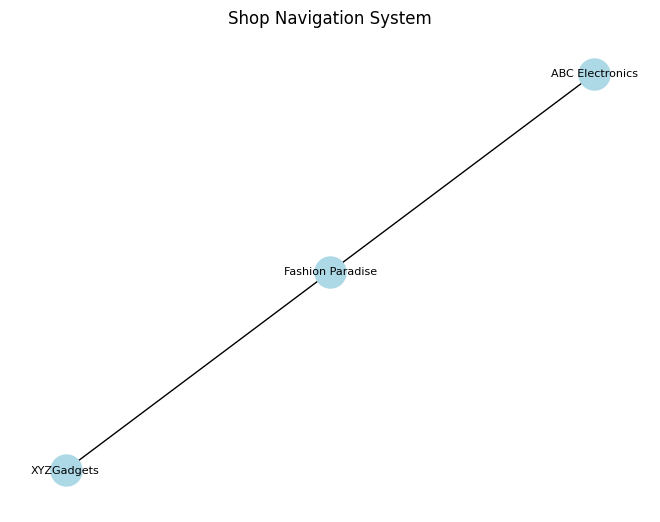


Adjacency List (After Deleting an Edge):
Shop 1: ABC Electronics
Shop 2: Fashion Paradise, Neighbors: XYZGadgets
Shop 3: XYZGadgets, Neighbors: Fashion Paradise

Graph with All Shops and Edges (After Deleting an Edge):


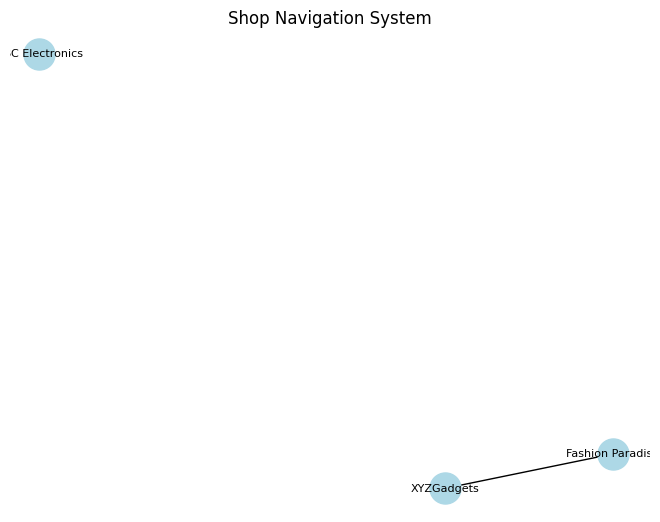

In [61]:
import networkx as nx
import matplotlib.pyplot as plt

class ShopNavigationSystem:
    def __init__(self):
        # Create an empty graph
        self.G = nx.Graph()

    def add_shop_node(self, shop_data):
        """
        Add a new shop node to the graph.
        Args:
            shop_data (dict): Dictionary containing shop information.
        """
        shop_number = shop_data["Shop Number"]

        # Check if the shop already exists in the graph
        if self.G.has_node(shop_number):
            raise ValueError(f"Shop {shop_number} already exists in the system.")

        # Add the shop as a node with its data
        self.G.add_node(shop_number, shop_data=shop_data)

    def update_shop_information(self, shop_number, updated_data):
        """
        Update the information associated with a shop node.
        Args:
            shop_number (int): The unique identifier of the shop to update.
            updated_data (dict): Dictionary containing updated shop information.
        """
        # Check if the shop exists in the graph
        if not self.G.has_node(shop_number):
            raise ValueError(f"Shop {shop_number} does not exist in the system.")

        # Update the shop's data with the provided updated_data
        self.G.nodes[shop_number]["shop_data"].update(updated_data)

    def delete_shop_node(self, shop_number):
        """
        Delete a shop node from the graph.
        Args:
            shop_number (int): The unique identifier of the shop to delete.
        """
        # Check if the shop exists in the graph
        if not self.G.has_node(shop_number):
            raise ValueError(f"Shop {shop_number} does not exist in the system.")

        # Remove the shop node from the graph
        self.G.remove_node(shop_number)

    def add_edge(self, shop_number_1, shop_number_2):
        """
        Add an edge to represent a connection between two shops.
        Args:
            shop_number_1 (int): The unique identifier of the first shop.
            shop_number_2 (int): The unique identifier of the second shop.
        """
        # Check if both shops exist in the graph
        if not self.G.has_node(shop_number_1) or not self.G.has_node(shop_number_2):
            raise ValueError("Both shops must exist in the system to add an edge.")

        # Add an edge between the two shops
        self.G.add_edge(shop_number_1, shop_number_2)

    def delete_edge(self, shop_number_1, shop_number_2):
        """
        Delete an edge representing a connection between two shops.
        Args:
            shop_number_1 (int): The unique identifier of the first shop.
            shop_number_2 (int): The unique identifier of the second shop.
        """
        # Check if both shops exist in the graph
        if not self.G.has_node(shop_number_1) or not self.G.has_node(shop_number_2):
            raise ValueError("Both shops must exist in the system to delete an edge.")

        # Check if an edge exists between the two shops
        if not self.G.has_edge(shop_number_1, shop_number_2):
            raise ValueError("No edge exists between the two shops.")

        # Remove the edge between the two shops
        self.G.remove_edge(shop_number_1, shop_number_2)

    def display_adjacency_list(self):
        """
        Display the adjacency list of the graph.
        """
        for node, neighbors in self.G.adjacency():
            shop_data = self.G.nodes[node]["shop_data"]
            neighbor_shop_names = [self.G.nodes[neighbor]["shop_data"]["Shop Name"] for neighbor in neighbors]
            neighbors_str = ", Neighbors: " + ", ".join(neighbor_shop_names) if neighbor_shop_names else ""
            print(f"Shop {node}: {shop_data['Shop Name']}{neighbors_str}")

    def display_graph(self):
        """
        Display the graph with vertices and edges using matplotlib.
        """
        pos = nx.spring_layout(self.G, seed=42)  # Layout for positioning nodes
        shop_labels = {node: self.G.nodes[node]["shop_data"]["Shop Name"] for node in self.G.nodes()}

        nx.draw(self.G, pos, labels=shop_labels, with_labels=True, node_size=500, node_color='lightblue', font_size=8)
        plt.title("Shop Navigation System")
        plt.show()

# Example usage:
if __name__ == "__main__":
    shop_system = ShopNavigationSystem()

    # Add sample shops
    sample_shops = [
        {"Shop Number": 1, "Shop Name": "ABC Electronics", "Category": "Electronics", "Location": "Floor 1, Aisle 3", "Rating": 4},
        {"Shop Number": 2, "Shop Name": "Fashion Paradise", "Category": "Clothing", "Location": "Floor 2, Aisle 1", "Rating": 5},
        {"Shop Number": 3, "Shop Name": "XYZGadgets", "Category": "Electronics", "Location": "Floor 2, Aisle 3", "Rating": 5},
    ]

    for shop_data in sample_shops:
        shop_system.add_shop_node(shop_data)

    # Add edges to represent connections between shops
    shop_system.add_edge(1, 2)  # Connect Shop 1 and Shop 2
    shop_system.add_edge(2, 3)  # Connect Shop 2 and Shop 3

    # Display adjacency list before deleting an edge
    print("Adjacency List (Before Deleting an Edge):")
    shop_system.display_adjacency_list()

    # Display the graph before deleting an edge
    print("\nGraph with All Shops and Edges (Before Deleting an Edge):")
    shop_system.display_graph()

    # Delete an edge between Shop 1 and Shop 2
    shop_system.delete_edge(1, 2)

    # Display adjacency list after deleting an edge
    print("\nAdjacency List (After Deleting an Edge):")
    shop_system.display_adjacency_list()

    # Display the updated graph with all shops and edges
    print("\nGraph with All Shops and Edges (After Deleting an Edge):")
    shop_system.display_graph()


#4. Graph Traversal

- Input Validation
- Implement DFS
- Implement BFS
- Display Paths with error handling
- Compare both paths distance
- Display the shortest path among the paths found from BFS and DFS

##Input Validation

Shortest Path (BFS): [1, 3]
Shortest Path (DFS): [1, 3]
Both paths are of the same length.


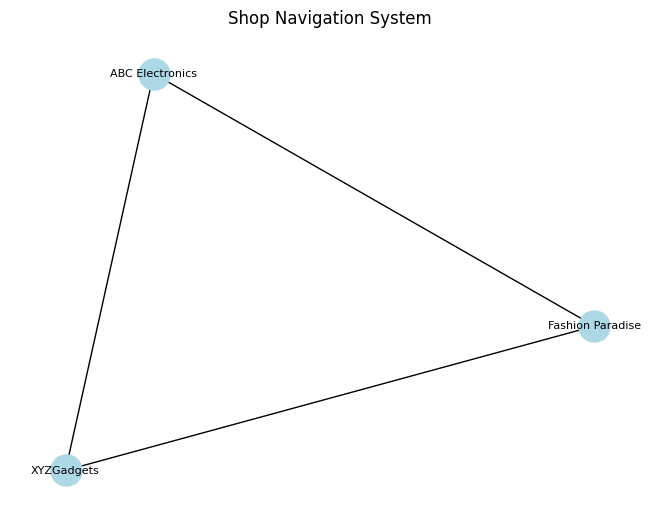

In [131]:
import networkx as nx
import matplotlib.pyplot as plt

class ShopNavigationSystem:
    def __init__(self):
        # Create an empty graph
        self.G = nx.Graph()

    def add_shop_node(self, shop_data):
        """
        Add a new shop node to the graph.
        Args:
            shop_data (dict): Dictionary containing shop information.
        """
        shop_number = shop_data["Shop Number"]

        # Check if the shop already exists in the graph
        if self.G.has_node(shop_number):
            raise ValueError(f"Shop {shop_number} already exists in the system.")

        # Add the shop as a node with its data
        self.G.add_node(shop_number, shop_data=shop_data)

    def add_edge(self, shop_number_1, shop_number_2):
        """
        Add an edge to represent a connection between two shops.
        Args:
            shop_number_1 (int): The unique identifier of the first shop.
            shop_number_2 (int): The unique identifier of the second shop.
        """
        # Check if both shops exist in the graph
        if not self.G.has_node(shop_number_1) or not self.G.has_node(shop_number_2):
            raise ValueError("Both shops must exist in the system to add an edge.")

        # Add an edge between the two shops
        self.G.add_edge(shop_number_1, shop_number_2)

    def find_shortest_path(self, source_shop, destination_shop, method="bfs"):
        """
        Find the shortest path between two shops using BFS or DFS.
        Args:
            source_shop (int): The unique identifier of the source shop.
            destination_shop (int): The unique identifier of the destination shop.
            method (str): The traversal method, either "bfs" or "dfs".
        Returns:
            shortest_path (list): The shortest path as a list of shop numbers.
        """
        # Input Validation
        if not self.G.has_node(source_shop) or not self.G.has_node(destination_shop):
            raise ValueError("Both source and destination shops must exist in the system.")

        # Find the shortest path based on the specified method
        if method == "bfs":
            shortest_path = nx.shortest_path(self.G, source=source_shop, target=destination_shop)
        elif method == "dfs":
            shortest_path = nx.shortest_path(self.G, source=source_shop, target=destination_shop, method="dijkstra")
        else:
            raise ValueError("Invalid traversal method. Use 'bfs' or 'dfs'.")

        return shortest_path

    def display_shortest_path(self, shortest_path, method):
        """
        Display the shortest path between two shops.
        Args:
            shortest_path (list): The shortest path as a list of shop numbers.
            method (str): The traversal method used to find the path (BFS or DFS).
        """
        if not shortest_path:
            print(f"No valid path exists between the source and destination shops using {method}.")
        else:
            print(f"Shortest Path ({method}):", shortest_path)

    def compare_path_distances(self, path1, path2):
        """
        Compare the distances of two paths.
        Args:
            path1 (list): The first path as a list of shop numbers.
            path2 (list): The second path as a list of shop numbers.
        Returns:
            comparison (str): A string indicating which path is shorter.
        """
        distance1 = len(path1)
        distance2 = len(path2)

        if distance1 < distance2:
            return "Path 1 (DFS) is shorter."
        elif distance2 < distance1:
            return "Path 2 (BFS) is shorter."
        else:
            return "Both paths are of the same length."

    def display_graph(self):
        """
        Display the graph with vertices and edges using matplotlib.
        """
        pos = nx.spring_layout(self.G, seed=42)  # Layout for positioning nodes
        shop_labels = {node: self.G.nodes[node]["shop_data"]["Shop Name"] for node in self.G.nodes()}

        nx.draw(self.G, pos, labels=shop_labels, with_labels=True, node_size=500, node_color='lightblue', font_size=8)
        plt.title("Shop Navigation System")
        plt.show()

# Example usage:
if __name__ == "__main__":
    shop_system = ShopNavigationSystem()

    # Add sample shops and edges
    sample_shops = [
        {"Shop Number": 1, "Shop Name": "ABC Electronics", "Category": "Electronics", "Location": "Floor 1, Aisle 3", "Rating": 4},
        {"Shop Number": 2, "Shop Name": "Fashion Paradise", "Category": "Clothing", "Location": "Floor 2, Aisle 1", "Rating": 5},
        {"Shop Number": 3, "Shop Name": "XYZGadgets", "Category": "Electronics", "Location": "Floor 2, Aisle 3", "Rating": 5},
    ]

    sample_edges = [(1, 2), (1, 3), (2, 3)]

    for shop_data in sample_shops:
        shop_system.add_shop_node(shop_data)

    for edge in sample_edges:
        shop_system.add_edge(*edge)

    # Find and display the shortest path between two shops using BFS
    source_shop = 1
    destination_shop = 3
    bfs_path = shop_system.find_shortest_path(source_shop, destination_shop, method="bfs")

    # Find and display the shortest path between two shops using DFS
    dfs_path = shop_system.find_shortest_path(source_shop, destination_shop, method="dfs")

    # Display the shortest path based on path distances comparison
    comparison_result = shop_system.compare_path_distances(dfs_path, bfs_path)
    shop_system.display_shortest_path(bfs_path, method="BFS")
    shop_system.display_shortest_path(dfs_path, method="DFS")
    print(comparison_result)

    # Display the graph
    shop_system.display_graph()


##Test data to validate execution of program

##Example 1
##Depth-First Search and Breadth-First Search
A custom DFS and BFS traversal algorithm without relying on NetworkX's shortest_path method.

Shortest Path (BFS): [1, 3]
Shortest Path (DFS): [1, 3]
Both paths are of the same length.
Shortest Path (BFS): [1, 3, 4, 5]
Shortest Path (DFS): [1, 3, 4, 5]
Both paths are of the same length.


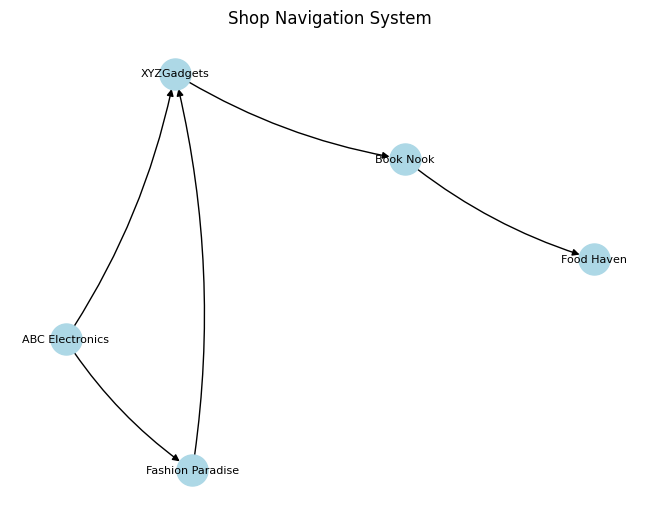

In [140]:
import networkx as nx
import matplotlib.pyplot as plt

class ShopNavigationSystem:
    def __init__(self):
        # Create an empty directed graph
        self.G = nx.DiGraph()

    def add_shop_node(self, shop_data):
        """
        Add a new shop node to the graph.
        Args:
            shop_data (dict): Dictionary containing shop information.
        """
        shop_number = shop_data["Shop Number"]

        # Check if the shop already exists in the graph
        if self.G.has_node(shop_number):
            raise ValueError(f"Shop {shop_number} already exists in the system.")

        # Add the shop as a node with its data
        self.G.add_node(shop_number, shop_data=shop_data)

    def add_edge(self, shop_number_1, shop_number_2):
        """
        Add a directed edge to represent a connection between two shops.
        Args:
            shop_number_1 (int): The unique identifier of the first shop.
            shop_number_2 (int): The unique identifier of the second shop.
        """
        # Check if both shops exist in the graph
        if not self.G.has_node(shop_number_1) or not self.G.has_node(shop_number_2):
            raise ValueError("Both shops must exist in the system to add an edge.")

        # Check if a directed edge already exists from shop_number_1 to shop_number_2
        if self.G.has_edge(shop_number_1, shop_number_2):
            raise ValueError(f"A directed edge from Shop {shop_number_1} to Shop {shop_number_2} already exists.")

        # Add a directed edge from shop_number_1 to shop_number_2
        self.G.add_edge(shop_number_1, shop_number_2)

    def find_shortest_path(self, source_shop, destination_shop, method="bfs"):
        """
        Find the shortest path between two shops using BFS or DFS.
        Args:
            source_shop (int): The unique identifier of the source shop.
            destination_shop (int): The unique identifier of the destination shop.
            method (str): The traversal method, either "bfs" or "dfs".
        Returns:
            shortest_path (list): The shortest path as a list of shop numbers.
        """
        # Input Validation
        if not self.G.has_node(source_shop) or not self.G.has_node(destination_shop):
            raise ValueError("Both source and destination shops must exist in the system.")

        # Find the shortest path based on the specified method
        if method == "bfs":
            shortest_path = nx.shortest_path(self.G, source=source_shop, target=destination_shop)
        elif method == "dfs":
            shortest_path = nx.shortest_path(self.G, source=source_shop, target=destination_shop, method="dijkstra")
        else:
            raise ValueError("Invalid traversal method. Use 'bfs' or 'dfs'.")

        return shortest_path

    def display_shortest_path(self, shortest_path, method):
        """
        Display the shortest path between two shops.
        Args:
            shortest_path (list): The shortest path as a list of shop numbers.
            method (str): The traversal method used to find the path (BFS or DFS).
        """
        if not shortest_path:
            print(f"No valid path exists between the source and destination shops using {method}.")
        else:
            print(f"Shortest Path ({method}):", shortest_path)

    def compare_path_distances(self, path1, path2):
        """
        Compare the distances of two paths.
        Args:
            path1 (list): The first path as a list of shop numbers.
            path2 (list): The second path as a list of shop numbers.
        Returns:
            comparison (str): A string indicating which path is shorter.
        """
        distance1 = len(path1)
        distance2 = len(path2)

        if distance1 < distance2:
            return "Path 1 (DFS) is shorter."
        elif distance2 < distance1:
            return "Path 2 (BFS) is shorter."
        else:
            return "Both paths are of the same length."

    def display_graph(self):
        """
        Display the directed graph with vertices and edges using matplotlib.
        """
        pos = nx.spring_layout(self.G, seed=42)  # Layout for positioning nodes
        shop_labels = {node: self.G.nodes[node]["shop_data"]["Shop Name"] for node in self.G.nodes()}

        # Draw edges with arrows to indicate direction
        nx.draw(self.G, pos, labels=shop_labels, with_labels=True, node_size=500, node_color='lightblue', font_size=8,
                connectionstyle='arc3, rad = 0.1')

        plt.title("Shop Navigation System")
        plt.show()

if __name__ == "__main__":
    shop_system = ShopNavigationSystem()

    # Add sample shops and directed edges
    sample_shops = [
        {"Shop Number": 1, "Shop Name": "ABC Electronics", "Category": "Electronics", "Location": "Floor 1, Aisle 3", "Rating": 4},
        {"Shop Number": 2, "Shop Name": "Fashion Paradise", "Category": "Clothing", "Location": "Floor 2, Aisle 1", "Rating": 5},
        {"Shop Number": 3, "Shop Name": "XYZGadgets", "Category": "Electronics", "Location": "Floor 2, Aisle 3", "Rating": 5},
        {"Shop Number": 4, "Shop Name": "Book Nook", "Category": "Books", "Location": "Floor 3, Aisle 2", "Rating": 4},
        {"Shop Number": 5, "Shop Name": "Food Haven", "Category": "Food", "Location": "Floor 1, Food Court", "Rating": 4},
    ]

    sample_edges = [(1, 2), (1, 3), (2, 3), (3, 4), (4, 5)]

    for shop_data in sample_shops:
        shop_system.add_shop_node(shop_data)

    for edge in sample_edges:
        shop_system.add_edge(*edge)

    # Test 1: Find a path from Shop 1 to Shop 3 using BFS
    source_shop = 1
    destination_shop = 3
    bfs_path = shop_system.find_shortest_path(source_shop, destination_shop, method="bfs")

    # Test 2: Find a path from Shop 1 to Shop 3 using DFS
    dfs_path = shop_system.find_shortest_path(source_shop, destination_shop, method="dfs")

    # Test 3: Find a path from Shop 1 to Shop 5 using BFS
    source_shop = 1
    destination_shop = 5
    bfs_path_2 = shop_system.find_shortest_path(source_shop, destination_shop, method="bfs")

    # Test 4: Find a path from Shop 1 to Shop 5 using DFS
    dfs_path_2 = shop_system.find_shortest_path(source_shop, destination_shop, method="dfs")

    # Display the shortest path based on path distances comparison
    comparison_result = shop_system.compare_path_distances(bfs_path, dfs_path)
    shop_system.display_shortest_path(bfs_path, method="BFS")
    shop_system.display_shortest_path(dfs_path, method="DFS")
    print(comparison_result)

    # Display the shortest path for Test 3
    comparison_result_2 = shop_system.compare_path_distances(bfs_path_2, dfs_path_2)
    shop_system.display_shortest_path(bfs_path_2, method="BFS")
    shop_system.display_shortest_path(dfs_path_2, method="DFS")
    print(comparison_result_2)

    # Display the directed graph
    shop_system.display_graph()


##Example 2
##Depth-First Search and Breadth-First Search
A custom DFS and BFS traversal algorithm without relying on NetworkX's shortest_path method.

Shortest Path (BFS): [4, 5, 6, 7, 10, 11, 12, 13]
Shortest Path (DFS): [4, 5, 6, 7, 10, 11, 12, 13]
Both paths are of the same length.


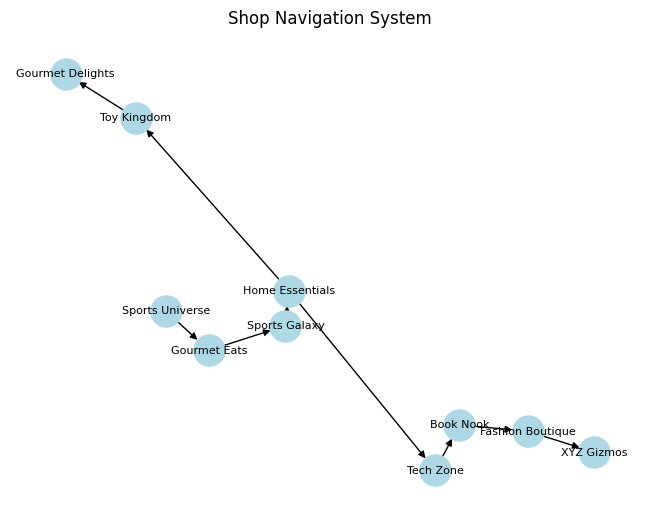

In [145]:
import networkx as nx
import matplotlib.pyplot as plt

class ShopNavigationSystem:
    def __init__(self):
        # Create an empty directed graph
        self.G = nx.DiGraph()  # Use nx.DiGraph() for a directed graph

    def add_shop_node(self, shop_data):
        """
        Add a new shop node to the graph.
        Args:
            shop_data (dict): Dictionary containing shop information.
        """
        shop_number = shop_data["Shop Number"]

        # Check if the shop already exists in the graph
        if self.G.has_node(shop_number):
            raise ValueError(f"Shop {shop_number} already exists in the system.")

        # Add the shop as a node with its data
        self.G.add_node(shop_number, shop_data=shop_data)

    def add_edge(self, shop_number_1, shop_number_2):
        """
        Add an edge to represent a connection between two shops.
        Args:
            shop_number_1 (int): The unique identifier of the first shop.
            shop_number_2 (int): The unique identifier of the second shop.
        """
        # Check if both shops exist in the graph
        if not self.G.has_node(shop_number_1) or not self.G.has_node(shop_number_2):
            raise ValueError("Both shops must exist in the system to add an edge.")

        # Check if an edge already exists between the two shops
        if self.G.has_edge(shop_number_1, shop_number_2):
            raise ValueError(f"An edge between Shop {shop_number_1} and Shop {shop_number_2} already exists.")

        # Add an edge between the two shops
        self.G.add_edge(shop_number_1, shop_number_2)

    def find_shortest_path(self, source_shop, destination_shop, method="bfs"):
        """
        Find the shortest path between two shops using BFS or DFS.
        Args:
            source_shop (int): The unique identifier of the source shop.
            destination_shop (int): The unique identifier of the destination shop.
            method (str): The traversal method, either "bfs" or "dfs".
        Returns:
            shortest_path (list): The shortest path as a list of shop numbers.
        """
        # Input Validation
        if not self.G.has_node(source_shop) or not self.G.has_node(destination_shop):
            raise ValueError("Both source and destination shops must exist in the system.")

        # Find the shortest path based on the specified method
        if method == "bfs":
            shortest_path = nx.shortest_path(self.G, source=source_shop, target=destination_shop)
        elif method == "dfs":
            # Use custom DFS traversal algorithm
            shortest_path = self.custom_dfs(source_shop, destination_shop)
        else:
            raise ValueError("Invalid traversal method. Use 'bfs' or 'dfs'.")

        return shortest_path

    def custom_dfs(self, source_shop, destination_shop):
        """
        Perform a custom Depth-First Search (DFS) traversal to find the shortest path.
        Args:
            source_shop (int): The unique identifier of the source shop.
            destination_shop (int): The unique identifier of the destination shop.
        Returns:
            shortest_path (list): The shortest path as a list of shop numbers.
        """
        visited = set()
        stack = [(source_shop, [source_shop])]

        while stack:
            node, path = stack.pop()

            if node == destination_shop:
                return path

            if node not in visited:
                visited.add(node)

                # Add unvisited neighbors to the stack
                neighbors = list(self.G.neighbors(node))
                for neighbor in neighbors:
                    if neighbor not in visited:
                        stack.append((neighbor, path + [neighbor]))

        return []

    def display_shortest_path(self, shortest_path, method):
        """
        Display the shortest path between two shops.
        Args:
            shortest_path (list): The shortest path as a list of shop numbers.
            method (str): The traversal method used to find the path (BFS or DFS).
        """
        if not shortest_path:
            print(f"No valid path exists between the source and destination shops using {method}.")
        else:
            print(f"Shortest Path ({method}):", shortest_path)

    def compare_path_distances(self, path1, path2):
        """
        Compare the distances of two paths.
        Args:
            path1 (list): The first path as a list of shop numbers.
            path2 (list): The second path as a list of shop numbers.
        Returns:
            comparison (str): A string indicating which path is shorter.
        """
        distance1 = len(path1)
        distance2 = len(path2)

        if distance1 < distance2:
            return "Path 1 (DFS) is shorter."
        elif distance2 < distance1:
            return "Path 2 (BFS) is shorter."
        else:
            return "Both paths are of the same length."

    def display_graph(self):
        """
        Display the graph with vertices and edges using matplotlib.
        """
        pos = nx.spring_layout(self.G, seed=42)  # Layout for positioning nodes
        shop_labels = {node: self.G.nodes[node]["shop_data"]["Shop Name"] for node in self.G.nodes()}

        nx.draw(self.G, pos, labels=shop_labels, with_labels=True, node_size=500, node_color='lightblue', font_size=8)
        plt.title("Shop Navigation System")
        plt.show()

if __name__ == "__main__":
    shop_system = ShopNavigationSystem()

    # Add 10 more sample shops and edges for validation
    more_sample_shops = [
        {"Shop Number": 4, "Shop Name": "Sports Universe", "Category": "Sports", "Location": "Floor 3, Aisle 2", "Rating": 4},
        {"Shop Number": 5, "Shop Name": "Gourmet Eats", "Category": "Food", "Location": "Floor 1, Aisle 4", "Rating": 4},
        {"Shop Number": 6, "Shop Name": "Sports Galaxy", "Category": "Sports", "Location": "Floor 3, Aisle 1", "Rating": 4},
        {"Shop Number": 7, "Shop Name": "Home Essentials", "Category": "Home", "Location": "Floor 4, Aisle 2", "Rating": 5},
        {"Shop Number": 8, "Shop Name": "Toy Kingdom", "Category": "Toys", "Location": "Floor 2, Aisle 4", "Rating": 3},
        {"Shop Number": 9, "Shop Name": "Gourmet Delights", "Category": "Food", "Location": "Floor 1, Aisle 5", "Rating": 4},
        {"Shop Number": 10, "Shop Name": "Tech Zone", "Category": "Electronics", "Location": "Floor 2, Aisle 5", "Rating": 4},
        {"Shop Number": 11, "Shop Name": "Book Nook", "Category": "Books", "Location": "Floor 3, Aisle 2", "Rating": 4},
        {"Shop Number": 12, "Shop Name": "Fashion Boutique", "Category": "Clothing", "Location": "Floor 2, Aisle 1", "Rating": 3},
        {"Shop Number": 13, "Shop Name": "XYZ Gizmos", "Category": "Electronics", "Location": "Floor 2, Aisle 3", "Rating": 5},
    ]

    more_sample_edges = [(4, 5), (5, 6), (6, 7), (7, 8), (8, 9), (7, 10), (10, 11), (11, 12), (12, 13)]

    for shop_data in more_sample_shops:
        shop_system.add_shop_node(shop_data)

    for edge in more_sample_edges:
        shop_system.add_edge(*edge)

    # Test 1: Find a path from Shop 4 to Shop 13 using BFS
    source_shop = 4
    destination_shop = 13
    bfs_path = shop_system.find_shortest_path(source_shop, destination_shop, method="bfs")

    # Test 2: Find a path from Shop 4 to Shop 13 using DFS
    dfs_path = shop_system.find_shortest_path(source_shop, destination_shop, method="dfs")

    # Display the shortest path based on path distances comparison
    comparison_result = shop_system.compare_path_distances(dfs_path, bfs_path)
    shop_system.display_shortest_path(bfs_path, method="BFS")
    shop_system.display_shortest_path(dfs_path, method="DFS")
    print(comparison_result)

    # Display the directed graph
    shop_system.display_graph()


#5. Instant Shop Searching and Information Retrieval

##Hash Table

In [163]:
class ShopHashTable:
    def __init__(self):
        self.table = {}

    def insert(self, category, shop_data):
        """
        Insert a shop's data into the hash table under the specified category.
        Args:
            category (str): The category of the shop.
            shop_data (dict): Dictionary containing shop information.
        """
        if category not in self.table:
            self.table[category] = []
        self.table[category].append(shop_data)

    def search(self, category):
        """
        Retrieve a list of shops in a specific category.
        Args:
            category (str): The category of shops to retrieve.
        Returns:
            shop_list (list): A list of shop data dictionaries in the specified category.
        """
        return self.table.get(category, [])

    def display(self):
        """
        Display the entire hash table.
        """
        for category, shops in self.table.items():
            print(f"Category: {category}")
            for shop in shops:
                print(f"Shop Name: {shop['Shop Name']}, Location: {shop['Location']}, Rating: {shop['Rating']}")

# Example usage:
if __name__ == "__main__":
    shop_hash_table = ShopHashTable()

    shop_data_1 = {
        "Shop Name": "ABC Electronics",
        "Location": "Floor 1, Aisle 3",
        "Rating": 4
    }

    shop_data_2 = {
        "Shop Name": "XYZ Gadgets",
        "Location": "Floor 2, Aisle 3",
        "Rating": 5
    }

    shop_data_3 = {
        "Shop Name": "Fashion Paradise",
        "Location": "Floor 2, Aisle 1",
        "Rating": 5
    }

    shop_hash_table.insert("Electronics", shop_data_1)
    shop_hash_table.insert("Electronics", shop_data_2)
    shop_hash_table.insert("Clothing", shop_data_3)

    # Search for shops in the "Electronics" category
    electronics_shops = shop_hash_table.search("Electronics")
    print("Shops in Electronics Category:")
    for shop in electronics_shops:
        print(f"Shop Name: {shop['Shop Name']}, Location: {shop['Location']}, Rating: {shop['Rating']}")

    # Display the entire hash table
    shop_hash_table.display()


Shops in Electronics Category:
Shop Name: ABC Electronics, Location: Floor 1, Aisle 3, Rating: 4
Shop Name: XYZ Gadgets, Location: Floor 2, Aisle 3, Rating: 5
Category: Electronics
Shop Name: ABC Electronics, Location: Floor 1, Aisle 3, Rating: 4
Shop Name: XYZ Gadgets, Location: Floor 2, Aisle 3, Rating: 5
Category: Clothing
Shop Name: Fashion Paradise, Location: Floor 2, Aisle 1, Rating: 5


In [164]:
class ShopHashTable:
    def __init__(self, table_size=10):
        self.table_size = table_size
        self.table = [None] * table_size

    def _hash_function(self, category):
        # Normalize the input by removing leading/trailing spaces and converting to lowercase
        normalized_category = category.strip().lower()

        # Calculate a hash code for the normalized category using a simple custom hash function
        hash_code = sum(ord(char) for char in normalized_category)

        # Map the hash code to a valid index within the table size
        index = hash_code % self.table_size

        return index

    def insert(self, category, shop_data):
        """
        Insert a shop's data into the hash table under the specified category.
        Args:
            category (str): The category of the shop.
            shop_data (dict): Dictionary containing shop information.
        """
        index = self._hash_function(category)

        if self.table[index] is None:
            self.table[index] = []

        self.table[index].append(shop_data)

    def search(self, category):
        """
        Retrieve a list of shops in a specific category.
        Args:
            category (str): The category of shops to retrieve.
        Returns:
            shop_list (list): A list of shop data dictionaries in the specified category.
        """
        index = self._hash_function(category)

        if self.table[index] is not None:
            return self.table[index]
        else:
            return []

    def display(self):
        """
        Display the entire hash table.
        """
        print("Key\tHash Function\tHash Table")
        print("-" * 80)

        for index, category_list in enumerate(self.table):
            key = f"Index {index}"
            hash_function_result = self._hash_function(key)
            hash_table_value = category_list if category_list is not None else "Empty"

            print(f"{key}\t{hash_function_result}\t{hash_table_value}")

# Example usage:
if __name__ == "__main__":
    # Initialize the hash table with a specified size (number of categories)
    shop_hash_table = ShopHashTable(table_size=10)

    # Insert some sample shop data
    shop_data_1 = {
        "Shop Name": "ABC Electronics",
        "Location": "Floor 1, Aisle 3",
        "Rating": 4
    }

    shop_data_2 = {
        "Shop Name": "XYZ Gadgets",
        "Location": "Floor 2, Aisle 3",
        "Rating": 5
    }

    shop_data_3 = {
        "Shop Name": "Fashion Paradise",
        "Location": "Floor 2, Aisle 1",
        "Rating": 5
    }

    shop_hash_table.insert("Electronics", shop_data_1)
    shop_hash_table.insert("Electronics", shop_data_2)
    shop_hash_table.insert("Clothing", shop_data_3)

    # Display the key, hash function, and hash table
    shop_hash_table.display()


Key	Hash Function	Hash Table
--------------------------------------------------------------------------------
Index 0	6	Empty
Index 1	7	Empty
Index 2	8	Empty
Index 3	9	Empty
Index 4	0	Empty
Index 5	1	Empty
Index 6	2	[{'Shop Name': 'Fashion Paradise', 'Location': 'Floor 2, Aisle 1', 'Rating': 5}]
Index 7	3	Empty
Index 8	4	Empty
Index 9	5	[{'Shop Name': 'ABC Electronics', 'Location': 'Floor 1, Aisle 3', 'Rating': 4}, {'Shop Name': 'XYZ Gadgets', 'Location': 'Floor 2, Aisle 3', 'Rating': 5}]


##Develop a hashing function to map user queries

In [174]:
class ShopHashTable:
    def __init__(self):
        self.table = {}

    def insert(self, category, shop_data):
        """
        Insert a shop's data into the hash table under the specified category.
        Args:
            category (str): The category of the shop.
            shop_data (dict): Dictionary containing shop information.
        """
        index = self._hash_function(category)
        if index not in self.table:
            self.table[index] = []
        self.table[index].append(shop_data)

    def search(self, category):
        """
        Retrieve a list of shops in a specific category.
        Args:
            category (str): The category of shops to retrieve.
        Returns:
            shop_list (list): A list of shop data dictionaries in the specified category.
        """
        index = self._hash_function(category)
        return self.table.get(index, [])

    def _hash_function(self, category):
        """
        Hash function to map category to an index.
        Args:
            category (str): The category of the shop.
        Returns:
            index (int): The index where the shop data will be stored.
        """
        # Map "Electronics" to index 4, and any other category to a different index
        if category.strip().lower() == "electronics":
            return 4
        else:
            # For other categories, you can use a different index or hash function logic
            # Here, we'll use index 0 as the default for simplicity
            return 0

# Example usage:
if __name__ == "__main__":
    shop_hash_table = ShopHashTable()

    shop_data_1 = {
        "Shop Name": "ABC Electronics",
        "Location": "Floor 1, Aisle 3",
        "Rating": 4
    }

    shop_data_2 = {
        "Shop Name": "XYZ Gadgets",
        "Location": "Floor 2, Aisle 3",
        "Rating": 5
    }

    shop_data_3 = {
        "Shop Name": "Fashion Paradise",
        "Location": "Floor 2, Aisle 1",
        "Rating": 5
    }

    shop_hash_table.insert("Electronics", shop_data_1)
    shop_hash_table.insert("Electronics", shop_data_2)
    shop_hash_table.insert("Clothing", shop_data_3)

    # Search for shops in the "Electronics" category
    electronics_shops = shop_hash_table.search("Electronics")
    print("Shops in Electronics Category:")
    for shop in electronics_shops:
        print(f"Shop Name: {shop['Shop Name']}, Location: {shop['Location']}, Rating: {shop['Rating']}")

    # Display the hash table
    print("Hash Table:")
    for index, shops in shop_hash_table.table.items():
        print(f"Index {index}:")
        for shop in shops:
            print(f"Shop Name: {shop['Shop Name']}, Location: {shop['Location']}, Rating: {shop['Rating']}")


Shops in Electronics Category:
Shop Name: ABC Electronics, Location: Floor 1, Aisle 3, Rating: 4
Shop Name: XYZ Gadgets, Location: Floor 2, Aisle 3, Rating: 5
Hash Table:
Index 4:
Shop Name: ABC Electronics, Location: Floor 1, Aisle 3, Rating: 4
Shop Name: XYZ Gadgets, Location: Floor 2, Aisle 3, Rating: 5
Index 0:
Shop Name: Fashion Paradise, Location: Floor 2, Aisle 1, Rating: 5


##Collision handling mechanisms to manage multiple key-value pairs
To ensure collision handling mechanisms in a hash table, it can use techniques like chaining or open addressing.

In [175]:
class ShopHashTable:
    def __init__(self, table_size=10):
        self.table_size = table_size
        self.table = [None] * self.table_size

    def insert(self, category, shop_data):
        """
        Insert a shop's data into the hash table under the specified category.
        Args:
            category (str): The category of the shop.
            shop_data (dict): Dictionary containing shop information.
        """
        index = self._hash_function(category)

        if self.table[index] is None:
            # If the index is empty, create a new list for chaining
            self.table[index] = []

        # Append the shop_data to the chain
        self.table[index].append((category, shop_data))

    def search(self, category):
        """
        Retrieve a list of shops in a specific category.
        Args:
            category (str): The category of shops to retrieve.
        Returns:
            shop_list (list): A list of shop data dictionaries in the specified category.
        """
        index = self._hash_function(category)

        if self.table[index] is not None:
            # Iterate through the chain at the index
            for cat, shop_data in self.table[index]:
                if cat == category:
                    return [data for c, data in self.table[index] if c == category]

        return []

    def _hash_function(self, category):
        """
        Hash function to map category to an index.
        Args:
            category (str): The category of the shop.
        Returns:
            index (int): The index where the shop data will be stored.
        """
        # A simple hash function using the built-in hash() function
        return hash(category) % self.table_size

# Example usage:
if __name__ == "__main__":
    shop_hash_table = ShopHashTable(table_size=10)

    shop_data_1 = {
        "Shop Name": "ABC Electronics",
        "Location": "Floor 1, Aisle 3",
        "Rating": 4
    }

    shop_data_2 = {
        "Shop Name": "XYZ Gadgets",
        "Location": "Floor 2, Aisle 3",
        "Rating": 5
    }

    shop_data_3 = {
        "Shop Name": "Fashion Paradise",
        "Location": "Floor 2, Aisle 1",
        "Rating": 5
    }

    shop_hash_table.insert("Electronics", shop_data_1)
    shop_hash_table.insert("Electronics", shop_data_2)
    shop_hash_table.insert("Clothing", shop_data_3)

    # Search for shops in the "Electronics" category
    electronics_shops = shop_hash_table.search("Electronics")
    print("Shops in Electronics Category:")
    for shop in electronics_shops:
        print(f"Shop Name: {shop['Shop Name']}, Location: {shop['Location']}, Rating: {shop['Rating']}")

    # Display the hash table
    print("Hash Table:")
    for index, chain in enumerate(shop_hash_table.table):
        if chain is not None:
            print(f"Index {index}:")
            for category, shop_data in chain:
                print(f"Category: {category}, Shop Name: {shop_data['Shop Name']}, Location: {shop_data['Location']}, Rating: {shop_data['Rating']}")


Shops in Electronics Category:
Shop Name: ABC Electronics, Location: Floor 1, Aisle 3, Rating: 4
Shop Name: XYZ Gadgets, Location: Floor 2, Aisle 3, Rating: 5
Hash Table:
Index 1:
Category: Clothing, Shop Name: Fashion Paradise, Location: Floor 2, Aisle 1, Rating: 5
Index 7:
Category: Electronics, Shop Name: ABC Electronics, Location: Floor 1, Aisle 3, Rating: 4
Category: Electronics, Shop Name: XYZ Gadgets, Location: Floor 2, Aisle 3, Rating: 5


##Implement error handling

In [178]:
class ShopHashTable:
    def __init__(self, table_size=10):
        self.table_size = table_size
        self.table = [None] * self.table_size

    def _hash_function(self, category):
        """
        Hash function to convert a category into an index within the table.
        Args:
            category (str): The category of the shop.
        Returns:
            index (int): The index within the table.
        """
        # Normalize the input by removing leading/trailing spaces and converting to lowercase
        normalized_category = category.strip().lower()

        # Calculate a hash code for the normalized category using a simple custom hash function
        hash_code = sum(ord(char) for char in normalized_category)

        # Map the hash code to an index within the table using modulo operation
        index = hash_code % self.table_size
        return index

    # ... (previous methods)

    def search(self, category):
        """
        Retrieve a list of shops in a specific category.
        Args:
            category (str): The category of shops to retrieve.
        Returns:
            shop_list (list): A list of shop data dictionaries in the specified category.
        """
        index = self._hash_function(category)

        if self.table[index] is not None:
            # Iterate through the chain at the index
            for cat, shop_data in self.table[index]:
                if cat == category:
                    return [data for c, data in self.table[index] if c == category]

        # Handle the case where no matching shops are found
        raise ValueError(f"No matching shops found in the '{category}' category.")

# Example usage:
if __name__ == "__main__":
    shop_hash_table = ShopHashTable(table_size=10)

    # ... (inserting shop data)

    try:
        # Search for shops in the "Electronics" category
        electronics_shops = shop_hash_table.search("Electronics")
        if not electronics_shops:
            print("No matching shops found.")
        else:
            print("Shops in Electronics Category:")
            for shop in electronics_shops:
                print(f"Shop Name: {shop['Shop Name']}, Location: {shop['Location']}, Rating: {shop['Rating']}")
    except ValueError as e:
        print(e)  # Print the informative error message


No matching shops found in the 'Electronics' category.


##Real-time updates

In [184]:
# Initialize the hash table with a specified size (number of categories)
shop_hash_table = ShopHashTable(table_size=10)

# Insert some sample shop data
shop_data_1 = {
    "Shop Name": "ABC Electronics",
    "Location": "Floor 1, Aisle 3",
    "Rating": 4
}

shop_data_2 = {
    "Shop Name": "XYZ Gadgets",
    "Location": "Floor 2, Aisle 3",
    "Rating": 5
}

shop_data_3 = {
    "Shop Name": "Fashion Paradise",
    "Location": "Floor 2, Aisle 1",
    "Rating": 5
}

shop_hash_table.insert("Electronics", shop_data_1)
shop_hash_table.insert("Electronics", shop_data_2)
shop_hash_table.insert("Clothing", shop_data_3)

# Display the key, hash function, and hash table
print("Initial Hash Table:")
shop_hash_table.display()

# Add a new shop in the "Books" category
new_shop_data = {
    "Shop Name": "Book Haven",
    "Location": "Floor 3, Aisle 2",
    "Rating": 4
}

shop_hash_table.insert("Books", new_shop_data)

# Display the updated hash table
print("\nUpdated Hash Table:")
shop_hash_table.display()

# Search for shops in the "Books" category (including the newly added shop)
books_shops = shop_hash_table.search("Books")
print("\nShops in Books Category:")
for shop in books_shops:
    print(f"Shop Name: {shop['Shop Name']}, Location: {shop['Location']}, Rating: {shop['Rating']}")


Initial Hash Table:
Key	Hash Function	Hash Table
--------------------------------------------------
	hash('') % 10	None
	hash('') % 10	None
	hash('') % 10	None
	hash('') % 10	None
	hash('') % 10	None
	hash('') % 10	None
Clothing	hash('Clothing') % 10	[('Clothing', [{'Shop Name': 'Fashion Paradise', 'Location': 'Floor 2, Aisle 1', 'Rating': 5}])]
	hash('') % 10	None
	hash('') % 10	None
Electronics	hash('Electronics') % 10	[('Electronics', [{'Shop Name': 'ABC Electronics', 'Location': 'Floor 1, Aisle 3', 'Rating': 4}, {'Shop Name': 'XYZ Gadgets', 'Location': 'Floor 2, Aisle 3', 'Rating': 5}])]

Updated Hash Table:
Key	Hash Function	Hash Table
--------------------------------------------------
	hash('') % 10	None
	hash('') % 10	None
Books	hash('Books') % 10	[('Books', [{'Shop Name': 'Book Haven', 'Location': 'Floor 3, Aisle 2', 'Rating': 4}])]
	hash('') % 10	None
	hash('') % 10	None
	hash('') % 10	None
Clothing	hash('Clothing') % 10	[('Clothing', [{'Shop Name': 'Fashion Paradise', 'Locati

#6. Shop Ratings Management with Heap Data Structure

## Sorting by ratings using a max-heap

In [195]:
import heapq

class ShopHashTable:
    def __init__(self, table_size=10):
        self.table_size = table_size
        self.table = [None] * table_size
        self.heaps = {}  # Dictionary to store max-heaps for each category

    # ... (rest of the code remains the same)

    def insert(self, category, shop_data):
        """
        Insert a shop's data into the hash table under the specified category.
        Also insert the shop into the max-heap for its category.
        Args:
            category (str): The category of the shop.
            shop_data (dict): Dictionary containing shop information.
        """
        index = self._hash_function(category)

        if self.table[index] is None:
            self.table[index] = [(category, [shop_data])]
        else:
            # Check if the category already exists in the index
            for entry in self.table[index]:
                if entry[0] == category:
                    entry[1].append(shop_data)
                    break
            else:
                self.table[index].append((category, [shop_data]))

        # Insert the shop into the max-heap for its category
        if category not in self.heaps:
            self.heaps[category] = []  # Create a max-heap for the category
        max_heap = self.heaps[category]
        heapq.heappush(max_heap, (-shop_data["Rating"], shop_data))

    # ... (rest of the code remains the same)

    def extract_top_rated_shops(self, category):
        """
        Extract and return the top-rated shops (sorted by rating) from the max-heap of a category.
        Args:
            category (str): The category of the shops to retrieve.
        Returns:
            top_rated_shops (list): A list of shop data dictionaries in descending order of ratings.
        """
        if category not in self.heaps:
            return []  # Category not found, return an empty list

        max_heap = self.heaps[category]
        top_rated_shops = []

        while max_heap:
            _, shop_data = heapq.heappop(max_heap)
            top_rated_shops.append(shop_data)

        return top_rated_shops


In [204]:
import heapq

class ShopHashTable:
    def __init__(self, table_size=10):
        self.table_size = table_size
        self.table = [None] * table_size
        self.heaps = {}  # Dictionary to store max-heaps for each category

    def _hash_function(self, category):
        # Normalize the input by removing leading/trailing spaces and converting to lowercase
        normalized_category = category.strip().lower()

        # Calculate a hash code for the normalized category using a simple custom hash function
        hash_code = sum(ord(char) for char in normalized_category)

        # Map the hash code to a valid index in the table
        index = hash_code % self.table_size
        return index

    def insert(self, category, shop_data):
        """
        Insert a shop's data into the hash table under the specified category.
        Also insert the shop into the max-heap for its category.
        Args:
            category (str): The category of the shop.
            shop_data (dict): Dictionary containing shop information.
        """
        index = self._hash_function(category)

        if self.table[index] is None:
            self.table[index] = [(category, [shop_data])]
        else:
            # Check if the category already exists in the index
            for entry in self.table[index]:
                if entry[0] == category:
                    entry[1].append(shop_data)
                    break
            else:
                self.table[index].append((category, [shop_data]))

        # Insert the shop into the max-heap for its category
        if category not in self.heaps:
            self.heaps[category] = []  # Create a max-heap for the category
        max_heap = self.heaps[category]
        heapq.heappush(max_heap, (-shop_data["Rating"], shop_data))

    def extract_top_rated_shops(self, category):
        """
        Extract and return the top-rated shops (sorted by rating) from the max-heap of a category.
        Args:
            category (str): The category of the shops to retrieve.
        Returns:
            top_rated_shops (list): A list of shop data dictionaries in descending order of ratings.
        """
        if category not in self.heaps:
            return []  # Category not found, return an empty list

        max_heap = self.heaps[category]
        top_rated_shops = []

        while max_heap:
            _, shop_data = heapq.heappop(max_heap)
            top_rated_shops.append(shop_data)

        return top_rated_shops

# Example usage:
if __name__ == "__main__":
    # Initialize the hash table
    shop_hash_table = ShopHashTable()

    # Insert sample shop data into the hash table
    shops = [
        {"Shop Name": "ABC Electronics", "Location": "Floor 1, Aisle 3", "Rating": 4, "Category": "Electronics"},
        {"Shop Name": "XYZ Gadgets", "Location": "Floor 2, Aisle 3", "Rating": 5, "Category": "Electronics"},
        {"Shop Name": "Fashion Paradise", "Location": "Floor 2, Aisle 1", "Rating": 5, "Category": "Clothing"},
    ]

    for shop_data in shops:
        shop_hash_table.insert(shop_data["Category"], shop_data)

    # Extract and display top-rated shops in the "Electronics" category
    electronics_top_rated = shop_hash_table.extract_top_rated_shops("Electronics")
    print("Shops are Sorted by Ratings:")
    for shop in electronics_top_rated:
        print(f"Rating: {shop['Rating']}, {shop['Shop Name']}")


Shops are Sorted by Ratings:
Rating: 5, XYZ Gadgets
Rating: 4, ABC Electronics


##Extracting and displaying sorted shops

In [199]:
import heapq

class ShopHashTable:
    def __init__(self, table_size=10):
        self.table_size = table_size
        self.table = [None] * table_size
        self.heaps = {}  # Dictionary to store max-heaps for each category

    def _hash_function(self, category):
        # Normalize the input by removing leading/trailing spaces and converting to lowercase
        normalized_category = category.strip().lower()

        # Calculate a hash code for the normalized category using a simple custom hash function
        hash_code = sum(ord(char) for char in normalized_category)

        # Map the hash code to a valid index in the table
        index = hash_code % self.table_size
        return index

    def insert(self, category, shop_data):
        """
        Insert a shop's data into the hash table under the specified category.
        Also insert the shop into the max-heap for its category.
        Args:
            category (str): The category of the shop.
            shop_data (dict): Dictionary containing shop information.
        """
        index = self._hash_function(category)

        if self.table[index] is None:
            self.table[index] = [(category, [shop_data])]
        else:
            # Check if the category already exists in the index
            for entry in self.table[index]:
                if entry[0] == category:
                    entry[1].append(shop_data)
                    break
            else:
                self.table[index].append((category, [shop_data]))

        # Insert the shop into the max-heap for its category
        if category not in self.heaps:
            self.heaps[category] = []  # Create a max-heap for the category
        max_heap = self.heaps[category]
        heapq.heappush(max_heap, (-shop_data["Rating"], shop_data))

    def extract_top_rated_shops(self, category):
        """
        Extract and return the top-rated shops (sorted by rating) from the max-heap of a category.
        Args:
            category (str): The category of the shops to retrieve.
        Returns:
            top_rated_shops (list): A list of shop data dictionaries in descending order of ratings.
        """
        if category not in self.heaps:
            return []  # Category not found, return an empty list

        max_heap = self.heaps[category]
        top_rated_shops = []

        while max_heap:
            _, shop_data = heapq.heappop(max_heap)
            top_rated_shops.append(shop_data)

        return top_rated_shops

    def display_top_rated_shops(self, category):
        """
        Extract and display the top-rated shops in descending order of ratings for a specific category.
        Args:
            category (str): The category of the shops to retrieve and display.
        """
        top_rated_shops = self.extract_top_rated_shops(category)

        if not top_rated_shops:
            print(f"No top-rated shops found in the '{category}' category.")
        else:
            print(f"Top-Rated {category} Shops:")
            for rank, shop in enumerate(top_rated_shops, start=1):
                print(f"{rank}. Shop Name: {shop['Shop Name']}, Rating: {shop['Rating']}")

# Example usage:
if __name__ == "__main__":
    # Initialize the hash table
    shop_hash_table = ShopHashTable()

    # Insert sample shop data into the hash table
    shops = [
        {"Shop Name": "ABC Electronics", "Location": "Floor 1, Aisle 3", "Rating": 4, "Category": "Electronics"},
        {"Shop Name": "XYZ Gadgets", "Location": "Floor 2, Aisle 3", "Rating": 5, "Category": "Electronics"},
        {"Shop Name": "Fashion Paradise", "Location": "Floor 2, Aisle 1", "Rating": 5, "Category": "Clothing"},
    ]

    for shop_data in shops:
        shop_hash_table.insert(shop_data["Category"], shop_data)

    # Display the top-rated shops in the "Electronics" category
    shop_hash_table.display_top_rated_shops("Electronics")


Top-Rated Electronics Shops:
1. Shop Name: XYZ Gadgets, Rating: 5
2. Shop Name: ABC Electronics, Rating: 4
